# Image Classification using Convolutional Neural Networks (CNN) on ASL Alphabet Dataset

## Objective


In this assignment, the goal is to implement a Convolutional Neural Network (CNN) for image classification on the American Sign Language (ASL) Alphabet dataset. The dataset consists of hand gesture images representing letters in the ASL alphabet. The provided code offers a starting point, and your tasks are detailed in the instructions below.

## Instructions

The assignment includes  two parts, the first is filling in the missing code in the provided code cells. The second deals with trying different hyperparameters etc. and disussing the outcomes.


### Part I




1. **Understanding the Code**
  
  Review the provided code cells, which include the necessary libraries, initial CNN architecture (ASLNet), data loading, model initialization, training loop, and evaluation on a test set.

2. **Dataset Handling**

  Confirm that you understand the structure of the ASL Alphabet dataset. Load the dataset. Apply appropriate data transformations to the images during loading (Cell 2). Explain the importance and choice of you transformations.
  The dataset should be downloaded from [Kaggle](https://www.kaggle.com/datasets/baoanhcr7/asl-alphabet).

  A tutorial on [mounting google drive on colab](https://www.youtube.com/watch?v=z1pBdycYCGY) to access files. Alternatively, you can download datasets from Kaggle directly to colab following this [tutorial](https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/).

3. **Model Architecture**
  
  Fill in the missing infromation in the model class (Cell 3 - ASLNet class), both in the initialization and the forward method. The model architicture should be in the following order:
  
  - Convolutional Layer 1: Implement a convolutional layer with 32 output channels, a 3x3 kernel size, a stride of 1, and a padding of 1.

  - ReLU Activation Function: Apply a ReLU activation function after the first convolutional layer.

  -  MaxPooling Layer: Add a max-pooling layer with a 2x2 kernel size and a stride of 2.

  -  Convolutional Layer 2: Implement a second convolutional layer with 64 output channels, a 3x3 kernel size, a stride of 1, and a padding of 1.

  - ReLU Activation Function.

  -  MaxPooling Layer: like above.

  - Flatten Layer: Reshapes the output of the second Pool layer into a one-dimensional tensor. The size is dynamically inferred based on the size of the feature maps.

  -  Fully Connected Layer 1 (Input Size: Dynamically Inferred Based on Previous Layer Output): Include a fully connected (linear) layer with an input size that is dynamically inferred based on the output size of the previous convolutional layer. Output size 128.

  - RelU Activation Function.

  -  Fully Connected Layer 2: Add a final fully connected (linear) layer with 29 output features, representing the 29 ASL labels (26 letters and 3 additional signs).

4. **Initalize Model**

  Initialize the ASLNet Model, define Cross Entropy as the loss functions and set up an Adam Optimizer with 0.001 learning rate (Cell 4).


5. **Model Training**
  
  Fill in the missing information in the training process (Cell 5).

5. **Visualization**
  
  Run the visualization of predictions in Cell 6.
  
  <!-- Discuss the unnormalization process and visualize more predictions if necessary. Comment on the Ground Truth and Predicted labels. Are there any misclassifications? If yes, analyze potential reasons. -->

6. **Model Evaluation**
  
  Review and run the evaluation on the test set in Cell 7. Comment on the achieved test accuracy. Discuss potential ways to further improve the model's performance.



### Part II

This part includes code related and open ended questions

1. Try three different activation functions in the ASLNet, discuss and compare the results of the changes.

2. Change the implemented optimizer to SGD with learning decay, discuss and compare the result of this change.

3. What is Cross Entrophy? Explain.

4. Which other loss function/s are suitable for the problem solved by the ASLNet?

5. The current implemented batch size is 8. Which other batch size could we work with? Present at least one option with an explanation as to why it works.




### Submission Guidelines:
*   Assignments are done in pairs, include both ids in the filename when submitting (e.g. *HW01_123456789_123456789.ipynb*).
*   Submit a Jupyter notebook containing your code modifications, comments, and analysis.
*   Include visualizations, graphs, or plots to support your analysis where needed.
*   Provide a conclusion summarizing your findings, challenges faced, and potential future improvements.


### Important Notes:

*  Ensure clarity in code comments and explanations for better understanding.
*  Experiment, analyze, and document your observations throughout the assignment.
*  Feel free to train on GPU (see example in practice 4 notebook).
*  It is recommended to explore the datasest and understand it well before implementation.
*  If answering open ended questions in Markdown is difficult, you can attatch a doc/pdf file to your submittion which holds any/all explanations. Just make sure it is aligned with the code somehow.
*  Feel free to seek clarification on any aspect of the assignment.

## Implementation

In [1]:
pip install opendatasets

In [2]:
pip install pandas

In [3]:
# Import necessary libraries

from PIL import Image
import os
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
import torchvision
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for the progress bar
import matplotlib
import seaborn as sns
import opendatasets as od
import pandas as pd

In [4]:
# Download ASL dataset
od.download(
	"https://www.kaggle.com/datasets/baoanhcr7/asl-alphabet")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: amirkedem
Your Kaggle Key: ··········


100%|██████████| 1.03G/1.03G [00:50<00:00, 21.6MB/s]


In [5]:
# Load ASL Alphabet dataset and apply transformations

transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((32,32), antialias=True), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = datasets.ImageFolder(root='./asl-alphabet/asl_alphabet_train/asl_alphabet_train', transform=transform)
trainloader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)

The chosen tranformation could be divided to two. We first wanted to reduce the image size, to reduce computational effort and memory allocation. The downside of course is losing information, but since we want ot focus on hand gestures which account for a siginificant size of the image, we do not relay in locating small objects and therefore could manage lower amount of pixels.

Second is we've normalized the data of all images to make them on a similar scale, normally distributed. We've defined it using this site https://discuss.pytorch.org/t/understanding-transform-normalize/21730

In [6]:
# Define the CNN architecture

class ASLNet(nn.Module):
  def __init__(self):
    super(ASLNet, self).__init__()
    self.conv1 = nn.Conv2d(3,32,kernel_size = 3, stride = 1, padding = 1)
    self.act1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)

    self.conv2 = nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1)
    self.act2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

    self.flat = nn.Flatten()
    self.fc3 = nn.Linear(4096, 128)
    self.act3 = nn.ReLU()
    self.fc4 = nn.Linear(128, 29)

  def forward(self, x):
    # input 3x32x32, output 32x32x32
    x = self.act1(self.conv1(x))
    # input 32x32x32, output 32x16x16
    x = self.pool1(x)
    # input 32x16x16, output 32x16x16
    x = self.act2(self.conv2(x))
    # input 32x16x16, output 64x8x8
    x = self.pool2(x)
    # input 64x8x8, output 4096
    x = self.flat(x)
    # input 12,544, output 896
    x = self.act3(self.fc3(x))
    #input 896, output 29
    x = self.fc4(x)

    return x

In [ ]:
#ASL Net with Tanh activation function

class ASLNetTanh(nn.Module):
  def __init__(self):
    super(ASLNetTanh, self).__init__()
    self.conv1 = nn.Conv2d(3,32,kernel_size = 3, stride = 1, padding = 1)
    self.act1 = nn.Tanh()
    self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)

    self.conv2 = nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1)
    self.act2 = nn.Tanh()
    self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

    self.flat = nn.Flatten()
    self.fc3 = nn.Linear(4096, 128)
    self.act3 = nn.Tanh()
    self.fc4 = nn.Linear(128, 29)

  def forward(self, x):
    # input 3x32x32, output 32x32x32
    x = self.act1(self.conv1(x))
    # input 32x32x32, output 32x16x16
    x = self.pool1(x)
    # input 32x16x16, output 32x16x16
    x = self.act2(self.conv2(x))
    # input 32x16x16, output 64x8x8
    x = self.pool2(x)
    # input 64x8x8, output 4096
    x = self.flat(x)
    # input 12,544, output 896
    x = self.act3(self.fc3(x))
    #input 896, output 29
    x = self.fc4(x)

    return x

In [ ]:
#ASL Net with Sigmoid activation function

class ASLNetSigmoid(nn.Module):
  def __init__(self):
    super(ASLNetSigmoid, self).__init__()
    self.conv1 = nn.Conv2d(3,32,kernel_size = 3, stride = 1, padding = 1)
    self.act1 = nn.Sigmoid()
    self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)

    self.conv2 = nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1)
    self.act2 = nn.Sigmoid()
    self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

    self.flat = nn.Flatten()
    self.fc3 = nn.Linear(4096, 128)
    self.act3 = nn.Sigmoid()
    self.fc4 = nn.Linear(128, 29)

  def forward(self, x):
    # input 3x32x32, output 32x32x32
    x = self.act1(self.conv1(x))
    # input 32x32x32, output 32x16x16
    x = self.pool1(x)
    # input 32x16x16, output 32x16x16
    x = self.act2(self.conv2(x))
    # input 32x16x16, output 64x8x8
    x = self.pool2(x)
    # input 64x8x8, output 4096
    x = self.flat(x)
    # input 12,544, output 896
    x = self.act3(self.fc3(x))
    #input 896, output 29
    x = self.fc4(x)

    return x

In [ ]:
#ASL Net with Softmax activation function

class ASLNetSoftmax(nn.Module):
  def __init__(self):
    super(ASLNetSoftmax, self).__init__()
    self.conv1 = nn.Conv2d(3,32,kernel_size = 3, stride = 1, padding = 1)
    self.act1 = nn.Softmax(dim=1) #must choose a dimention, chose the first channel
    self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)

    self.conv2 = nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1)
    self.act2 = nn.Softmax(dim=1)
    self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

    self.flat = nn.Flatten()
    self.fc3 = nn.Linear(4096, 128)
    self.act3 = nn.Softmax(dim=1)
    self.fc4 = nn.Linear(128, 29)

  def forward(self, x):
    # input 3x32x32, output 32x32x32
    x = self.act1(self.conv1(x))
    # input 32x32x32, output 32x16x16
    x = self.pool1(x)
    # input 32x16x16, output 32x16x16
    x = self.act2(self.conv2(x))
    # input 32x16x16, output 64x8x8
    x = self.pool2(x)
    # input 64x8x8, output 4096
    x = self.flat(x)
    # input 12,544, output 896
    x = self.act3(self.fc3(x))
    #input 896, output 29
    x = self.fc4(x)

    return x

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
#General model accuracy function
#Input - model parameters
#Output - accuracy results, float64

def model_accuracy(current):

  testset_path = './asl-alphabet/asl_alphabet_test/asl_alphabet_test'

  for test_img in os.listdir(testset_path): #create a dir for each class to match training set format.
    c = test_img.split('_')[0]
    os.makedirs(os.path.join(testset_path, c), exist_ok=True)
    shutil.move(os.path.join(testset_path, test_img), os.path.join(testset_path, c))


  # Provide the path to your test set
  testset = datasets.ImageFolder(root=testset_path, transform=transform)

  # Use the DataLoader to create batches
  testloader = DataLoader(testset, batch_size=8, shuffle=True)


  current.eval()  # Set the model to evaluation mode

  # Define the criterion for the test
  criterion = nn.CrossEntropyLoss()

  # Test the model on the test set
  total_correct = 0
  total_samples = 0

  with torch.no_grad():
    for inputs, labels in testloader:
      outputs = current(inputs)
      _, predicted = torch.max(outputs, 1)
      total_samples += labels.size(0)
      total_correct += (predicted == labels).sum().item()

  accuracy = total_correct / total_samples
  print(f'Test Accuracy: {accuracy * 100:.2f}%')

  return accuracy*100

In [9]:
# Initialize the CNN, loss function, and optimizer

asl_net = ASLNet()
loss_asl = nn.CrossEntropyLoss()
optimizer_asl = torch.optim.Adam(asl_net.parameters(), lr = 0.001)


### **Part I**

In [10]:
# Training the CNN for ASL Alphabet classification
num_epochs = 5
losses = []
average_loss = []

if __name__ == '__main__':
  for epoch in range(num_epochs):
    running_loss = 0.0
    total_loss=0.0

    #progress_bar = tqdm(total=len(trainloader), desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch')

    for i, data in enumerate(tqdm(trainloader), 0):
      optimizer_asl.zero_grad()

      inputs, labels = data
      outputs = asl_net(inputs)

      loss = loss_asl(outputs, labels)
      loss.backward()
      optimizer_asl.step()

      running_loss += loss.item()
      total_loss += loss.item()

      if i % 1000 == 999:  # print every 1000 mini-batche
        print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
        average_loss.append(running_loss/1000)
        running_loss = 0.0

    losses.append(total_loss/len(trainloader))

    print('Finished Training')

  9%|▉         | 1007/10875 [00:34<03:59, 41.19it/s]

[1,  1000] loss: 2.366


 18%|█▊        | 2007/10875 [01:06<03:46, 39.14it/s]

[1,  2000] loss: 1.160


 28%|██▊       | 3005/10875 [01:34<04:11, 31.34it/s]

[1,  3000] loss: 0.715


 37%|███▋      | 4004/10875 [02:01<04:20, 26.39it/s]

[1,  4000] loss: 0.512


 46%|████▌     | 5007/10875 [02:29<02:19, 42.12it/s]

[1,  5000] loss: 0.402


 55%|█████▌    | 6004/10875 [02:57<01:59, 40.79it/s]

[1,  6000] loss: 0.317


 64%|██████▍   | 7006/10875 [03:25<01:39, 38.78it/s]

[1,  7000] loss: 0.257


 74%|███████▎  | 8003/10875 [03:54<01:24, 34.16it/s]

[1,  8000] loss: 0.238


 83%|████████▎ | 9007/10875 [04:24<00:49, 37.76it/s]

[1,  9000] loss: 0.186


 92%|█████████▏| 10007/10875 [04:52<00:23, 36.21it/s]

[1, 10000] loss: 0.178


100%|██████████| 10875/10875 [05:17<00:00, 34.29it/s]


Finished Training


  9%|▉         | 1006/10875 [00:28<04:07, 39.90it/s]

[2,  1000] loss: 0.132


 18%|█▊        | 2004/10875 [00:57<03:52, 38.08it/s]

[2,  2000] loss: 0.128


 28%|██▊       | 3006/10875 [01:26<03:45, 34.86it/s]

[2,  3000] loss: 0.130


 37%|███▋      | 4004/10875 [01:55<02:59, 38.38it/s]

[2,  4000] loss: 0.121


 46%|████▌     | 5004/10875 [02:23<02:35, 37.85it/s]

[2,  5000] loss: 0.107


 55%|█████▌    | 6003/10875 [02:51<02:18, 35.14it/s]

[2,  6000] loss: 0.113


 64%|██████▍   | 7003/10875 [03:20<02:39, 24.31it/s]

[2,  7000] loss: 0.094


 74%|███████▎  | 8008/10875 [03:49<01:11, 39.86it/s]

[2,  8000] loss: 0.091


 83%|████████▎ | 9006/10875 [04:17<00:49, 37.71it/s]

[2,  9000] loss: 0.101


 92%|█████████▏| 10004/10875 [04:45<00:23, 37.48it/s]

[2, 10000] loss: 0.084


100%|██████████| 10875/10875 [05:10<00:00, 35.00it/s]


Finished Training


  9%|▉         | 1003/10875 [00:28<06:02, 27.22it/s]

[3,  1000] loss: 0.076


 18%|█▊        | 2004/10875 [00:58<04:01, 36.66it/s]

[3,  2000] loss: 0.059


 28%|██▊       | 3007/10875 [01:26<03:33, 36.88it/s]

[3,  3000] loss: 0.076


 37%|███▋      | 4005/10875 [01:55<03:10, 36.11it/s]

[3,  4000] loss: 0.068


 46%|████▌     | 5004/10875 [02:23<03:22, 29.01it/s]

[3,  5000] loss: 0.067


 55%|█████▌    | 6005/10875 [02:53<02:06, 38.36it/s]

[3,  6000] loss: 0.070


 64%|██████▍   | 7004/10875 [03:21<01:42, 37.92it/s]

[3,  7000] loss: 0.056


 74%|███████▎  | 8004/10875 [03:50<01:17, 37.16it/s]

[3,  8000] loss: 0.069


 83%|████████▎ | 9005/10875 [04:18<01:08, 27.40it/s]

[3,  9000] loss: 0.058


 92%|█████████▏| 10005/10875 [04:48<00:22, 37.92it/s]

[3, 10000] loss: 0.052


100%|██████████| 10875/10875 [05:13<00:00, 34.73it/s]


Finished Training


  9%|▉         | 1007/10875 [00:29<04:19, 38.10it/s]

[4,  1000] loss: 0.060


 18%|█▊        | 2004/10875 [00:57<03:43, 39.63it/s]

[4,  2000] loss: 0.044


 28%|██▊       | 3004/10875 [01:26<05:15, 24.94it/s]

[4,  3000] loss: 0.066


 37%|███▋      | 4005/10875 [01:56<02:59, 38.23it/s]

[4,  4000] loss: 0.050


 46%|████▌     | 5005/10875 [02:24<02:39, 36.72it/s]

[4,  5000] loss: 0.047


 55%|█████▌    | 6006/10875 [02:53<02:09, 37.58it/s]

[4,  6000] loss: 0.057


 64%|██████▍   | 7003/10875 [03:22<02:40, 24.14it/s]

[4,  7000] loss: 0.044


 74%|███████▎  | 8007/10875 [03:51<01:14, 38.61it/s]

[4,  8000] loss: 0.046


 83%|████████▎ | 9006/10875 [04:20<00:49, 37.64it/s]

[4,  9000] loss: 0.046


 92%|█████████▏| 10005/10875 [04:48<00:23, 37.51it/s]

[4, 10000] loss: 0.038


100%|██████████| 10875/10875 [05:13<00:00, 34.64it/s]


Finished Training


  9%|▉         | 1004/10875 [00:30<07:26, 22.11it/s]

[5,  1000] loss: 0.040


 18%|█▊        | 2006/10875 [00:58<04:02, 36.60it/s]

[5,  2000] loss: 0.043


 28%|██▊       | 3005/10875 [01:27<03:47, 34.61it/s]

[5,  3000] loss: 0.053


 37%|███▋      | 4005/10875 [01:56<03:01, 37.94it/s]

[5,  4000] loss: 0.031


 46%|████▌     | 5007/10875 [02:26<02:41, 36.22it/s]

[5,  5000] loss: 0.063


 55%|█████▌    | 6005/10875 [02:55<02:09, 37.49it/s]

[5,  6000] loss: 0.033


 64%|██████▍   | 7007/10875 [03:24<01:42, 37.84it/s]

[5,  7000] loss: 0.038


 74%|███████▎  | 8004/10875 [03:53<01:48, 26.42it/s]

[5,  8000] loss: 0.050


 83%|████████▎ | 9004/10875 [04:23<00:49, 37.70it/s]

[5,  9000] loss: 0.050


 92%|█████████▏| 10007/10875 [04:52<00:23, 37.56it/s]

[5, 10000] loss: 0.036


100%|██████████| 10875/10875 [05:18<00:00, 34.19it/s]

Finished Training


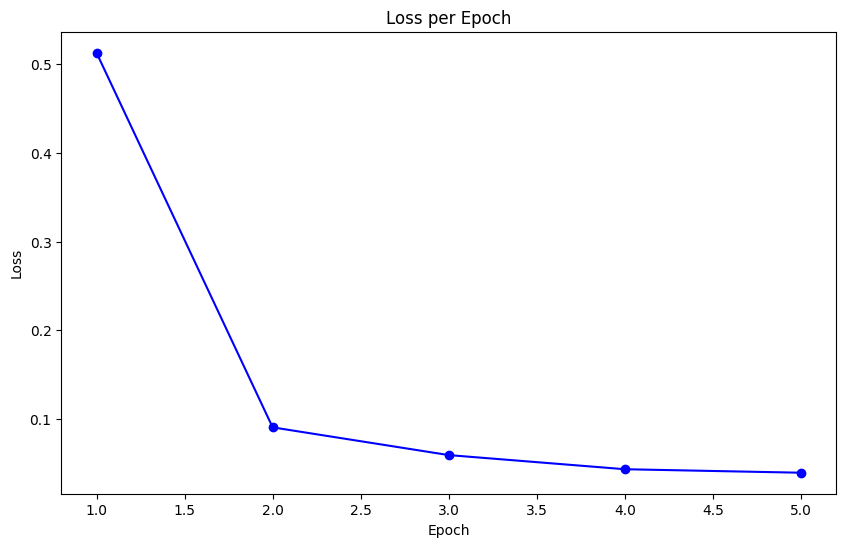

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), losses, marker='o', linestyle='-', color='blue')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

The above graph presents the loss per epoch. We can see that after the second epoch most of the learning was alreayd done and we can stop after 2-3 epochs

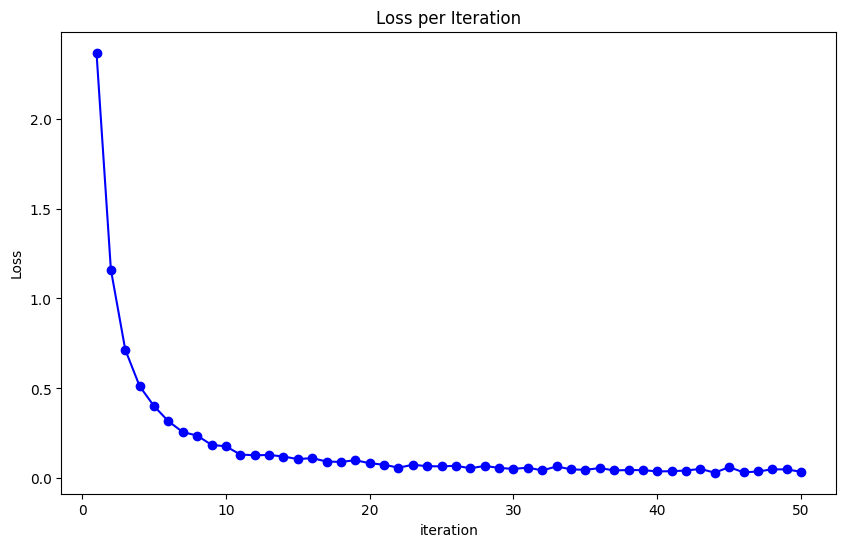

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), average_loss, marker='o', linestyle='-', color='blue')
plt.title('Loss per Iteration')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

This plot shows what happens to the loss every 1000 iterations, this gives a bit more informaiton compared to the first grasph. Each epoch is ~10 1000 iterations, so after we can even notice that after the first epoch almost all learning has been done and the loss was greatly reduced

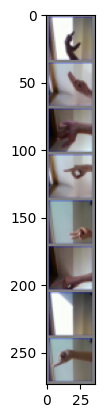

GroundTruth:     Q     H     T     D     V     D     \     Z
Predicted:     Q     H     T     D     V     D     \     Z


In [ ]:
# Visualize some predictions

dataiter = iter(trainloader)
images, labels = next(dataiter)

def imshow(img):
  img = img / 2 + 0.5  # unnormalize
  plt.imshow(torch.transpose(img, 0, 2).numpy())
  plt.show()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth:', ' '.join('%5s' % chr(ord('A') + labels[j]) for j in range(len(labels))))

outputs = asl_net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted:', ' '.join('%5s' % chr(ord('A') + predicted[j]) for j in range(len(predicted))))


In [ ]:
accuracy=model_accuracy(asl_net)

Test Accuracy: 100.00%


**Results of reLU and Adam optimizer on ASLNet**

The model performed very well. After two epochs we could have stopped, but as long we've continues, there was still some learning of the model and no vanishing gradients.

Althgouth the results are promising, the test data is very small and has just one sample per letter. Additionally, training images are very similer to one another in terms of object size, background, lighting, and orientation. We believe that for real life scenarios the object would not perfrom as well which points to an overfitting problem with this model. In order to overcome this, there are manipulations that could be done on current images e.g. resizing to other sizes than 32x32, randomly rotating images, apply masks to remove parts of the hand, adjusting contrast and brightness to account for different backgrounds. Also there is a need for additional test data, so could either reduce training data or devide the train and validation more towards validation when using K-Fold for different hyper parameters

### ***Part II***

We will now test three different activation functions

In [ ]:
# Run three different activation functions instead of ReLU, we chose Tanh, Softmax and Sigmoid

num_epochs = 5
losses_per_epoch = {'Tanh': [], 'Softmax': [], 'Sigmoid': []}
accuracy_per_model = {'Tanh': [], 'Softmax': [], 'Sigmoid': []}

models = {
    'Tanh': ASLNetTanh(),
    'Softmax': ASLNetSoftmax(),
    'Sigmoid': ASLNetSigmoid()
}

for activation_function, model in models.items():
    optimizer_asl = torch.optim.Adam(model.parameters(), lr=0.001)

    print(f"Training model with {activation_function} activation...")

    if __name__ == '__main__':
      for epoch in range(num_epochs):
        running_loss = 0.0
        total_loss=0.0

        for i, data in enumerate(tqdm(trainloader), 0):
          optimizer_asl.zero_grad()

          inputs, labels = data
          outputs = model(inputs)

          loss = loss_asl(outputs, labels)
          loss.backward()
          optimizer_asl.step()

          running_loss += loss.item()
          total_loss += loss.item()

          if i % 1000 == 999:  # print every 1000 mini-batche
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

        losses_per_epoch[activation_function].append(total_loss/len(trainloader))

        print('Finished Training')

      #save the accuracy of the model
      accuracy_per_model[activation_function].append(model_accuracy(model))


Training model with Tanh activation...


  9%|▉         | 1007/10875 [00:25<03:36, 45.52it/s]

[1,  1000] loss: 2.031


 18%|█▊        | 2008/10875 [00:49<03:13, 45.71it/s]

[1,  2000] loss: 1.050


 28%|██▊       | 3006/10875 [01:13<03:00, 43.67it/s]

[1,  3000] loss: 0.754


 37%|███▋      | 4006/10875 [01:38<02:37, 43.60it/s]

[1,  4000] loss: 0.580


 46%|████▌     | 5003/10875 [02:02<03:33, 27.53it/s]

[1,  5000] loss: 0.444


 55%|█████▌    | 6003/10875 [02:26<02:24, 33.72it/s]

[1,  6000] loss: 0.384


 64%|██████▍   | 7009/10875 [02:51<01:24, 45.83it/s]

[1,  7000] loss: 0.337


 74%|███████▎  | 8004/10875 [03:15<01:05, 43.64it/s]

[1,  8000] loss: 0.279


 83%|████████▎ | 9008/10875 [03:40<00:44, 42.00it/s]

[1,  9000] loss: 0.280


 92%|█████████▏| 10005/10875 [04:05<00:20, 42.78it/s]

[1, 10000] loss: 0.258


100%|██████████| 10875/10875 [04:26<00:00, 40.77it/s]


Finished Training


  9%|▉         | 1006/10875 [00:24<03:39, 45.04it/s]

[2,  1000] loss: 0.213


 18%|█▊        | 2009/10875 [00:49<03:18, 44.59it/s]

[2,  2000] loss: 0.190


 28%|██▊       | 3009/10875 [01:14<03:14, 40.42it/s]

[2,  3000] loss: 0.220


 37%|███▋      | 4003/10875 [01:38<04:19, 26.51it/s]

[2,  4000] loss: 0.193


 46%|████▌     | 5005/10875 [02:02<03:05, 31.72it/s]

[2,  5000] loss: 0.187


 55%|█████▌    | 6005/10875 [02:26<01:46, 45.55it/s]

[2,  6000] loss: 0.167


 64%|██████▍   | 7007/10875 [02:51<01:24, 45.68it/s]

[2,  7000] loss: 0.200


 74%|███████▎  | 8006/10875 [03:15<01:03, 45.05it/s]

[2,  8000] loss: 0.180


 83%|████████▎ | 9008/10875 [03:40<00:41, 44.76it/s]

[2,  9000] loss: 0.170


 92%|█████████▏| 10006/10875 [04:04<00:20, 42.43it/s]

[2, 10000] loss: 0.169


100%|██████████| 10875/10875 [04:26<00:00, 40.82it/s]


Finished Training


  9%|▉         | 1005/10875 [00:24<04:29, 36.58it/s]

[3,  1000] loss: 0.160


 18%|█▊        | 2006/10875 [00:51<03:23, 43.57it/s]

[3,  2000] loss: 0.173


 28%|██▊       | 3006/10875 [01:16<03:23, 38.66it/s]

[3,  3000] loss: 0.146


 37%|███▋      | 4004/10875 [01:42<03:39, 31.37it/s]

[3,  4000] loss: 0.158


 46%|████▌     | 5004/10875 [02:09<02:21, 41.43it/s]

[3,  5000] loss: 0.139


 55%|█████▌    | 6007/10875 [02:35<02:02, 39.87it/s]

[3,  6000] loss: 0.152


 64%|██████▍   | 7005/10875 [03:01<01:37, 39.84it/s]

[3,  7000] loss: 0.152


 74%|███████▎  | 8007/10875 [03:28<01:13, 39.03it/s]

[3,  8000] loss: 0.163


 83%|████████▎ | 9004/10875 [03:55<00:43, 43.40it/s]

[3,  9000] loss: 0.151


 92%|█████████▏| 10007/10875 [04:20<00:20, 41.97it/s]

[3, 10000] loss: 0.149


100%|██████████| 10875/10875 [04:43<00:00, 38.35it/s]


Finished Training


  9%|▉         | 1005/10875 [00:26<05:11, 31.68it/s]

[4,  1000] loss: 0.143


 18%|█▊        | 2006/10875 [00:53<03:54, 37.81it/s]

[4,  2000] loss: 0.157


 28%|██▊       | 3005/10875 [01:20<03:15, 40.35it/s]

[4,  3000] loss: 0.127


 37%|███▋      | 4004/10875 [01:46<02:43, 42.09it/s]

[4,  4000] loss: 0.154


 46%|████▌     | 5005/10875 [02:14<02:24, 40.60it/s]

[4,  5000] loss: 0.120


 55%|█████▌    | 6008/10875 [02:40<01:55, 42.08it/s]

[4,  6000] loss: 0.157


 64%|██████▍   | 7004/10875 [03:06<01:34, 40.88it/s]

[4,  7000] loss: 0.182


 74%|███████▎  | 8004/10875 [03:32<01:13, 39.09it/s]

[4,  8000] loss: 0.144


 83%|████████▎ | 9007/10875 [03:59<00:44, 41.74it/s]

[4,  9000] loss: 0.151


 92%|█████████▏| 10006/10875 [04:25<00:21, 41.04it/s]

[4, 10000] loss: 0.146


100%|██████████| 10875/10875 [04:51<00:00, 37.34it/s]


Finished Training


  9%|▉         | 1004/10875 [00:31<06:23, 25.74it/s]

[5,  1000] loss: 0.128


 18%|█▊        | 2005/10875 [01:02<03:49, 38.63it/s]

[5,  2000] loss: 0.143


 28%|██▊       | 3006/10875 [01:30<03:10, 41.25it/s]

[5,  3000] loss: 0.167


 37%|███▋      | 4004/10875 [01:57<03:03, 37.49it/s]

[5,  4000] loss: 0.170


 46%|████▌     | 5005/10875 [02:24<02:25, 40.32it/s]

[5,  5000] loss: 0.138


 55%|█████▌    | 6004/10875 [02:51<02:06, 38.36it/s]

[5,  6000] loss: 0.142


 64%|██████▍   | 7004/10875 [03:19<01:38, 39.46it/s]

[5,  7000] loss: 0.170


 74%|███████▎  | 8006/10875 [03:46<01:18, 36.77it/s]

[5,  8000] loss: 0.146


 83%|████████▎ | 9003/10875 [04:14<01:21, 22.99it/s]

[5,  9000] loss: 0.150


 92%|█████████▏| 10008/10875 [04:42<00:22, 39.27it/s]

[5, 10000] loss: 0.160


100%|██████████| 10875/10875 [05:04<00:00, 35.70it/s]


Finished Training
Test Accuracy: 100.00%
Training model with Softmax activation...


  9%|▉         | 1003/10875 [00:26<06:29, 25.37it/s]

[1,  1000] loss: 3.369


 18%|█▊        | 2004/10875 [00:53<06:42, 22.02it/s]

[1,  2000] loss: 3.369


 28%|██▊       | 3004/10875 [01:20<04:49, 27.21it/s]

[1,  3000] loss: 3.369


 37%|███▋      | 4003/10875 [01:45<04:15, 26.90it/s]

[1,  4000] loss: 3.369


 46%|████▌     | 5004/10875 [02:11<03:33, 27.53it/s]

[1,  5000] loss: 3.369


 55%|█████▌    | 6002/10875 [02:36<02:08, 37.95it/s]

[1,  6000] loss: 3.369


 64%|██████▍   | 7001/10875 [03:01<01:33, 41.49it/s]

[1,  7000] loss: 3.369


 74%|███████▎  | 8002/10875 [03:27<01:14, 38.51it/s]

[1,  8000] loss: 3.369


 83%|████████▎ | 9003/10875 [03:53<00:50, 36.89it/s]

[1,  9000] loss: 3.369


 92%|█████████▏| 10006/10875 [04:18<00:19, 43.49it/s]

[1, 10000] loss: 3.234


100%|██████████| 10875/10875 [04:40<00:00, 38.75it/s]


Finished Training


  9%|▉         | 1008/10875 [00:25<03:38, 45.07it/s]

[2,  1000] loss: 2.895


 18%|█▊        | 2006/10875 [00:50<03:21, 43.91it/s]

[2,  2000] loss: 2.781


 28%|██▊       | 3008/10875 [01:15<02:57, 44.33it/s]

[2,  3000] loss: 2.671


 37%|███▋      | 4005/10875 [01:40<02:40, 42.89it/s]

[2,  4000] loss: 2.573


 46%|████▌     | 5005/10875 [02:05<02:18, 42.39it/s]

[2,  5000] loss: 2.496


 55%|█████▌    | 6009/10875 [02:30<01:48, 44.75it/s]

[2,  6000] loss: 2.438


 64%|██████▍   | 7007/10875 [02:55<01:27, 44.32it/s]

[2,  7000] loss: 2.375


 74%|███████▎  | 8006/10875 [03:21<01:07, 42.43it/s]

[2,  8000] loss: 2.333


 83%|████████▎ | 9007/10875 [03:46<00:56, 33.04it/s]

[2,  9000] loss: 2.296


 92%|█████████▏| 10004/10875 [04:11<00:31, 27.45it/s]

[2, 10000] loss: 2.248


100%|██████████| 10875/10875 [04:33<00:00, 39.77it/s]


Finished Training


  9%|▉         | 1009/10875 [00:25<03:44, 43.96it/s]

[3,  1000] loss: 2.179


 18%|█▊        | 2007/10875 [00:50<03:22, 43.73it/s]

[3,  2000] loss: 2.147


 28%|██▊       | 3006/10875 [01:16<03:03, 42.80it/s]

[3,  3000] loss: 2.129


 37%|███▋      | 4007/10875 [01:41<02:43, 42.03it/s]

[3,  4000] loss: 2.093


 46%|████▌     | 5005/10875 [02:06<02:19, 42.06it/s]

[3,  5000] loss: 2.073


 55%|█████▌    | 6007/10875 [02:32<01:54, 42.58it/s]

[3,  6000] loss: 2.036


 64%|██████▍   | 7007/10875 [02:57<01:30, 42.85it/s]

[3,  7000] loss: 2.031


 74%|███████▎  | 8007/10875 [03:22<01:05, 43.96it/s]

[3,  8000] loss: 2.003


 83%|████████▎ | 9005/10875 [03:48<00:41, 45.35it/s]

[3,  9000] loss: 1.980


 92%|█████████▏| 10007/10875 [04:13<00:20, 42.68it/s]

[3, 10000] loss: 1.956


100%|██████████| 10875/10875 [04:35<00:00, 39.49it/s]


Finished Training


  9%|▉         | 1007/10875 [00:26<03:58, 41.37it/s]

[4,  1000] loss: 1.913


 18%|█▊        | 2005/10875 [00:51<04:00, 36.90it/s]

[4,  2000] loss: 1.880


 28%|██▊       | 3004/10875 [01:17<04:04, 32.14it/s]

[4,  3000] loss: 1.863


 37%|███▋      | 4004/10875 [01:42<04:15, 26.88it/s]

[4,  4000] loss: 1.846


 46%|████▌     | 5004/10875 [02:11<04:31, 21.66it/s]

[4,  5000] loss: 1.824


 55%|█████▌    | 6004/10875 [02:36<03:09, 25.74it/s]

[4,  6000] loss: 1.801


 64%|██████▍   | 7004/10875 [03:01<02:31, 25.50it/s]

[4,  7000] loss: 1.790


 74%|███████▎  | 8005/10875 [03:26<01:43, 27.67it/s]

[4,  8000] loss: 1.759


 83%|████████▎ | 9003/10875 [03:52<01:07, 27.63it/s]

[4,  9000] loss: 1.738


 92%|█████████▏| 10004/10875 [04:17<00:25, 34.08it/s]

[4, 10000] loss: 1.725


100%|██████████| 10875/10875 [04:40<00:00, 38.77it/s]


Finished Training


  9%|▉         | 1008/10875 [00:25<03:43, 44.09it/s]

[5,  1000] loss: 1.679


 18%|█▊        | 2008/10875 [00:51<03:21, 43.96it/s]

[5,  2000] loss: 1.657


 28%|██▊       | 3005/10875 [01:16<03:01, 43.35it/s]

[5,  3000] loss: 1.653


 37%|███▋      | 4008/10875 [01:42<02:33, 44.84it/s]

[5,  4000] loss: 1.621


 46%|████▌     | 5008/10875 [02:07<02:16, 43.05it/s]

[5,  5000] loss: 1.601


 55%|█████▌    | 6009/10875 [02:33<01:51, 43.69it/s]

[5,  6000] loss: 1.582


 64%|██████▍   | 7006/10875 [02:58<01:30, 42.70it/s]

[5,  7000] loss: 1.573


 74%|███████▎  | 8005/10875 [03:23<01:09, 41.51it/s]

[5,  8000] loss: 1.547


 83%|████████▎ | 9007/10875 [03:49<00:43, 43.15it/s]

[5,  9000] loss: 1.528


 92%|█████████▏| 10007/10875 [04:14<00:21, 41.03it/s]

[5, 10000] loss: 1.519


100%|██████████| 10875/10875 [04:37<00:00, 39.24it/s]


Finished Training
Test Accuracy: 55.17%
Training model with Sigmoid activation...


  9%|▉         | 1009/10875 [00:24<03:52, 42.46it/s]

[1,  1000] loss: 3.191


 18%|█▊        | 2003/10875 [00:48<05:17, 27.95it/s]

[1,  2000] loss: 2.536


 28%|██▊       | 3009/10875 [01:12<02:54, 45.01it/s]

[1,  3000] loss: 2.100


 37%|███▋      | 4006/10875 [01:36<02:35, 44.05it/s]

[1,  4000] loss: 1.805


 46%|████▌     | 5007/10875 [02:01<02:10, 44.86it/s]

[1,  5000] loss: 1.566


 55%|█████▌    | 6007/10875 [02:25<01:49, 44.28it/s]

[1,  6000] loss: 1.393


 64%|██████▍   | 7005/10875 [02:50<01:23, 46.24it/s]

[1,  7000] loss: 1.230


 74%|███████▎  | 8005/10875 [03:14<01:03, 44.89it/s]

[1,  8000] loss: 1.128


 83%|████████▎ | 9008/10875 [03:39<00:42, 43.52it/s]

[1,  9000] loss: 0.998


 92%|█████████▏| 10007/10875 [04:05<00:21, 40.67it/s]

[1, 10000] loss: 0.936


100%|██████████| 10875/10875 [04:30<00:00, 40.26it/s]


Finished Training


  9%|▉         | 1004/10875 [00:29<04:25, 37.14it/s]

[2,  1000] loss: 0.773


 18%|█▊        | 2004/10875 [00:58<03:49, 38.72it/s]

[2,  2000] loss: 0.710


 28%|██▊       | 3007/10875 [01:29<03:41, 35.47it/s]

[2,  3000] loss: 0.672


 37%|███▋      | 4004/10875 [02:00<03:11, 35.93it/s]

[2,  4000] loss: 0.612


 46%|████▌     | 5004/10875 [02:32<04:16, 22.87it/s]

[2,  5000] loss: 0.584


 55%|█████▌    | 6003/10875 [03:05<02:33, 31.80it/s]

[2,  6000] loss: 0.535


 64%|██████▍   | 7003/10875 [03:43<02:02, 31.61it/s]

[2,  7000] loss: 0.474


 74%|███████▎  | 8005/10875 [04:17<01:34, 30.50it/s]

[2,  8000] loss: 0.454


 83%|████████▎ | 9006/10875 [04:51<00:56, 32.92it/s]

[2,  9000] loss: 0.421


 92%|█████████▏| 10005/10875 [05:26<00:27, 32.22it/s]

[2, 10000] loss: 0.382


100%|██████████| 10875/10875 [05:57<00:00, 30.44it/s]


Finished Training


  9%|▉         | 1003/10875 [00:35<05:28, 30.09it/s]

[3,  1000] loss: 0.331


 18%|█▊        | 2006/10875 [01:11<04:44, 31.13it/s]

[3,  2000] loss: 0.342


 28%|██▊       | 3004/10875 [01:47<04:41, 27.96it/s]

[3,  3000] loss: 0.296


 37%|███▋      | 4003/10875 [02:24<04:25, 25.85it/s]

[3,  4000] loss: 0.309


 46%|████▌     | 5004/10875 [03:02<03:19, 29.49it/s]

[3,  5000] loss: 0.259


 55%|█████▌    | 6005/10875 [03:40<02:49, 28.68it/s]

[3,  6000] loss: 0.257


 64%|██████▍   | 7004/10875 [04:18<02:26, 26.51it/s]

[3,  7000] loss: 0.242


 74%|███████▎  | 8004/10875 [04:56<01:44, 27.51it/s]

[3,  8000] loss: 0.243


 83%|████████▎ | 9005/10875 [05:34<01:04, 29.02it/s]

[3,  9000] loss: 0.230


 92%|█████████▏| 10004/10875 [06:12<00:31, 27.37it/s]

[3, 10000] loss: 0.214


100%|██████████| 10875/10875 [06:45<00:00, 26.83it/s]


Finished Training


  9%|▉         | 1002/10875 [00:39<05:51, 28.11it/s]

[4,  1000] loss: 0.184


 18%|█▊        | 2003/10875 [01:18<06:00, 24.62it/s]

[4,  2000] loss: 0.178


 28%|██▊       | 3003/10875 [01:58<05:31, 23.75it/s]

[4,  3000] loss: 0.166


 37%|███▋      | 4002/10875 [02:39<04:22, 26.19it/s]

[4,  4000] loss: 0.161


 46%|████▌     | 5006/10875 [03:20<03:31, 27.76it/s]

[4,  5000] loss: 0.161


 55%|█████▌    | 6004/10875 [04:01<02:54, 27.93it/s]

[4,  6000] loss: 0.151


 64%|██████▍   | 7003/10875 [04:41<02:52, 22.41it/s]

[4,  7000] loss: 0.139


 74%|███████▎  | 8002/10875 [05:23<01:45, 27.16it/s]

[4,  8000] loss: 0.147


 83%|████████▎ | 9005/10875 [06:08<01:12, 25.95it/s]

[4,  9000] loss: 0.140


 92%|█████████▏| 10003/10875 [06:51<00:38, 22.56it/s]

[4, 10000] loss: 0.137


100%|██████████| 10875/10875 [07:27<00:00, 24.28it/s]


Finished Training


  9%|▉         | 1003/10875 [00:42<06:49, 24.10it/s]

[5,  1000] loss: 0.108


 18%|█▊        | 2003/10875 [01:25<06:02, 24.46it/s]

[5,  2000] loss: 0.106


 28%|██▊       | 3004/10875 [02:09<05:09, 25.44it/s]

[5,  3000] loss: 0.114


 37%|███▋      | 4002/10875 [02:51<04:36, 24.83it/s]

[5,  4000] loss: 0.105


 46%|████▌     | 5002/10875 [03:33<04:03, 24.09it/s]

[5,  5000] loss: 0.103


 55%|█████▌    | 6003/10875 [04:17<03:28, 23.42it/s]

[5,  6000] loss: 0.099


 64%|██████▍   | 7003/10875 [05:02<02:33, 25.19it/s]

[5,  7000] loss: 0.103


 74%|███████▎  | 8004/10875 [05:48<01:56, 24.65it/s]

[5,  8000] loss: 0.088


 83%|████████▎ | 9003/10875 [06:32<01:20, 23.23it/s]

[5,  9000] loss: 0.084


 92%|█████████▏| 10004/10875 [07:19<00:39, 22.00it/s]

[5, 10000] loss: 0.096


100%|██████████| 10875/10875 [08:00<00:00, 22.64it/s]


Finished Training
Test Accuracy: 100.00%


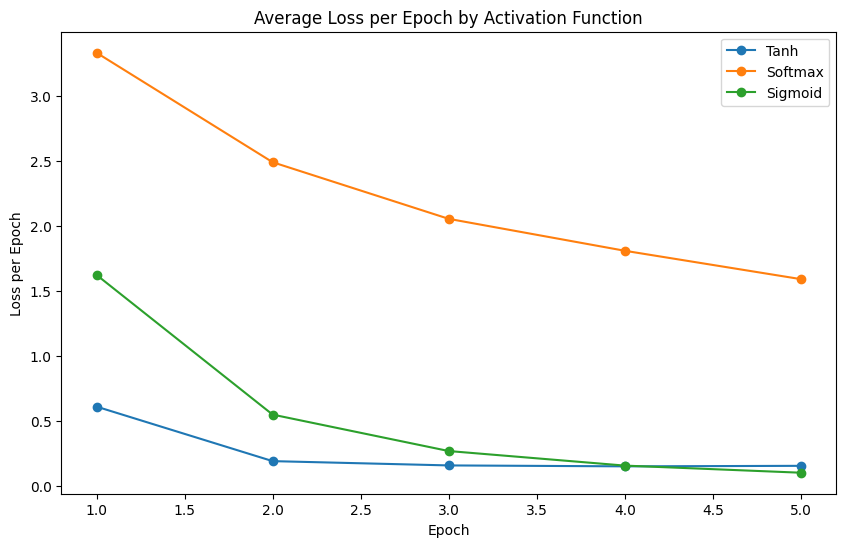

In [ ]:
plt.figure(figsize=(10, 6))
for activation_function, losses in losses_per_epoch.items():
    plt.plot(range(1, num_epochs+1), losses, marker='o', linestyle='-', label=activation_function)

plt.title('Average Loss per Epoch by Activation Function')
plt.xlabel('Epoch')
plt.ylabel('Loss per Epoch')
plt.legend()
plt.show()

In [ ]:
accuracy_per_model['RelU']=accuracy
accuracyDf=pd.DataFrame.from_dict(accuracy_per_model).T.reset_index()
accuracyDf.rename(columns={0:'score'}, inplace=True)
accuracyDf

,index,score
0,Tanh,100.000000
1,Softmax,55.172414
2,Sigmoid,100.000000
3,RelU,100.000000


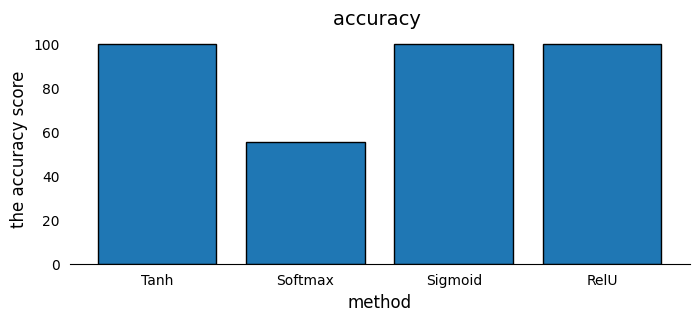

In [ ]:
plt.figure(figsize=(8, 3))
plt.bar(accuracyDf['index'],accuracyDf['score'], edgecolor='black')
plt.title('accuracy ', fontsize=14)
plt.xlabel('method', fontsize=12)
plt.ylabel('the accuracy score', fontsize=12)
sns.despine(top=True, right=True, bottom=False, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.show()

**Comparing the three activation functions:**

*   Tanh - good results, about 4.5 minutes per epoch and  doens't require more than two epochs to reach 100% accuracy
*   Softmax - very slow convergence, might require many more epochs to converge, similar time per epoch as Tanh. 55% accuracity which is not acceptable
*   Sigmoid - in the long run has better results by a small margin, but average epoch of around 8 minutes

Tanh is the most suitible activation function for this task since we normalized our data from -1 to 1, making it and ideal fit with the activation funciton's output. However, after the 2nd Epoch we encouted a vanishing gradient and there was no continuous reduction in loss

Softmax is not suitible for convolution layers since it accounct for only one dimension, usually the classification channel, and should be used mainly for the final layer in classification. In this case most of the data is disregarded making it longer to learn features accurately

If we had to choose a differnt activation function for reLU we would prefer Sigmoid, due to the vanishing gradient problem in Tanh

As we've shown in the loss by epoch graph, the accuracy of Softmax falls very short which was not surprising

We will now test ASL Net with SGD optimizer

In [12]:
# Training the CNN for ASL Alphabet classification using SGD as optimizer

asl_net_SGD = ASLNet() #initialize a new net for SGD
# Set the optimizer
optimizer_sgd = torch.optim.SGD(asl_net_SGD.parameters(), lr = 0.001)
num_epochs = 5
losses_SGD = [] #array to keep loss per epoch
average_loss_SGD = [] #array to keep average loss in each iteration of 1000 batches

if __name__ == '__main__':
  for epoch in range(num_epochs):
    running_loss = 0.0
    total_loss=0.0

    for i, data in enumerate(tqdm(trainloader), 0):
      optimizer_sgd.zero_grad()

      inputs, labels = data
      outputs = asl_net_SGD(inputs)

      loss = loss_asl(outputs, labels)
      loss.backward()
      optimizer_sgd.step()

      running_loss += loss.item()
      total_loss += loss.item()

      if i % 1000 == 999:  # print every 1000 mini-batche
        print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
        average_loss_SGD.append(running_loss/1000)
        running_loss = 0.0

    losses_SGD.append(total_loss/len(trainloader))

    print('Finished Training')

  9%|▉         | 1011/10875 [00:21<03:02, 54.08it/s]

[1,  1000] loss: 3.366


 18%|█▊        | 2006/10875 [00:40<02:38, 56.08it/s]

[1,  2000] loss: 3.361


 28%|██▊       | 3006/10875 [01:00<02:27, 53.23it/s]

[1,  3000] loss: 3.353


 37%|███▋      | 4008/10875 [01:20<02:03, 55.48it/s]

[1,  4000] loss: 3.344


 46%|████▌     | 5007/10875 [01:40<01:48, 54.21it/s]

[1,  5000] loss: 3.324


 55%|█████▌    | 6001/10875 [02:00<01:31, 53.23it/s]

[1,  6000] loss: 3.285


 64%|██████▍   | 7007/10875 [02:20<01:13, 52.90it/s]

[1,  7000] loss: 3.213


 74%|███████▎  | 8003/10875 [02:40<01:28, 32.52it/s]

[1,  8000] loss: 3.083


 83%|████████▎ | 9006/10875 [03:00<00:34, 54.62it/s]

[1,  9000] loss: 2.917


 92%|█████████▏| 10008/10875 [03:20<00:16, 53.96it/s]

[1, 10000] loss: 2.743


100%|██████████| 10875/10875 [03:37<00:00, 49.96it/s]


Finished Training


  9%|▉         | 1006/10875 [00:20<05:48, 28.33it/s]

[2,  1000] loss: 2.489


 18%|█▊        | 2011/10875 [00:41<02:34, 57.42it/s]

[2,  2000] loss: 2.365


 28%|██▊       | 3009/10875 [01:05<02:21, 55.73it/s]

[2,  3000] loss: 2.220


 37%|███▋      | 4011/10875 [01:25<02:05, 54.82it/s]

[2,  4000] loss: 2.133


 46%|████▌     | 5011/10875 [01:44<01:45, 55.54it/s]

[2,  5000] loss: 2.033


 55%|█████▌    | 6006/10875 [02:04<01:24, 57.63it/s]

[2,  6000] loss: 1.921


 64%|██████▍   | 7005/10875 [02:24<01:06, 57.92it/s]

[2,  7000] loss: 1.865


 74%|███████▎  | 8007/10875 [02:44<00:51, 55.62it/s]

[2,  8000] loss: 1.750


 83%|████████▎ | 9009/10875 [03:03<00:33, 56.05it/s]

[2,  9000] loss: 1.666


 92%|█████████▏| 10009/10875 [03:24<00:15, 54.85it/s]

[2, 10000] loss: 1.608


100%|██████████| 10875/10875 [03:41<00:00, 49.20it/s]


Finished Training


  9%|▉         | 1008/10875 [00:20<02:56, 56.03it/s]

[3,  1000] loss: 1.469


 18%|█▊        | 2007/10875 [00:40<02:38, 55.80it/s]

[3,  2000] loss: 1.409


 28%|██▊       | 3009/10875 [01:00<02:20, 55.92it/s]

[3,  3000] loss: 1.353


 37%|███▋      | 4003/10875 [01:20<03:39, 31.33it/s]

[3,  4000] loss: 1.316


 46%|████▌     | 5006/10875 [01:40<01:46, 55.27it/s]

[3,  5000] loss: 1.258


 55%|█████▌    | 6006/10875 [02:01<01:31, 53.07it/s]

[3,  6000] loss: 1.210


 64%|██████▍   | 7009/10875 [02:20<01:10, 54.53it/s]

[3,  7000] loss: 1.168


 74%|███████▎  | 8005/10875 [02:40<00:50, 56.50it/s]

[3,  8000] loss: 1.145


 83%|████████▎ | 9006/10875 [03:00<00:33, 56.61it/s]

[3,  9000] loss: 1.089


 92%|█████████▏| 10011/10875 [03:20<00:15, 56.42it/s]

[3, 10000] loss: 1.059


100%|██████████| 10875/10875 [03:37<00:00, 49.98it/s]


Finished Training


  9%|▉         | 1006/10875 [00:20<03:00, 54.67it/s]

[4,  1000] loss: 0.985


 18%|█▊        | 2011/10875 [00:40<02:43, 54.07it/s]

[4,  2000] loss: 0.961


 28%|██▊       | 3008/10875 [01:00<02:27, 53.45it/s]

[4,  3000] loss: 0.919


 37%|███▋      | 4011/10875 [01:19<02:03, 55.68it/s]

[4,  4000] loss: 0.892


 46%|████▌     | 5009/10875 [01:40<01:48, 54.18it/s]

[4,  5000] loss: 0.890


 55%|█████▌    | 6005/10875 [02:00<02:31, 32.10it/s]

[4,  6000] loss: 0.827


 64%|██████▍   | 7007/10875 [02:20<01:09, 55.75it/s]

[4,  7000] loss: 0.828


 74%|███████▎  | 8006/10875 [02:40<00:54, 52.96it/s]

[4,  8000] loss: 0.786


 83%|████████▎ | 9006/10875 [03:00<00:34, 54.38it/s]

[4,  9000] loss: 0.753


 92%|█████████▏| 10009/10875 [03:20<00:15, 55.53it/s]

[4, 10000] loss: 0.746


100%|██████████| 10875/10875 [03:37<00:00, 50.07it/s]


Finished Training


  9%|▉         | 1010/10875 [00:20<02:54, 56.46it/s]

[5,  1000] loss: 0.702


 18%|█▊        | 2005/10875 [00:40<02:43, 54.21it/s]

[5,  2000] loss: 0.684


 28%|██▊       | 3011/10875 [01:00<02:22, 55.00it/s]

[5,  3000] loss: 0.659


 37%|███▋      | 4006/10875 [01:19<02:06, 54.09it/s]

[5,  4000] loss: 0.661


 46%|████▌     | 5011/10875 [01:40<01:44, 56.08it/s]

[5,  5000] loss: 0.644


 55%|█████▌    | 6007/10875 [02:00<02:14, 36.13it/s]

[5,  6000] loss: 0.624


 64%|██████▍   | 7006/10875 [02:19<01:08, 56.88it/s]

[5,  7000] loss: 0.568


 74%|███████▎  | 8006/10875 [02:40<01:09, 41.48it/s]

[5,  8000] loss: 0.582


 83%|████████▎ | 9006/10875 [03:00<00:33, 55.08it/s]

[5,  9000] loss: 0.569


 92%|█████████▏| 10007/10875 [03:20<00:16, 53.57it/s]

[5, 10000] loss: 0.572


100%|██████████| 10875/10875 [03:37<00:00, 49.98it/s]

Finished Training


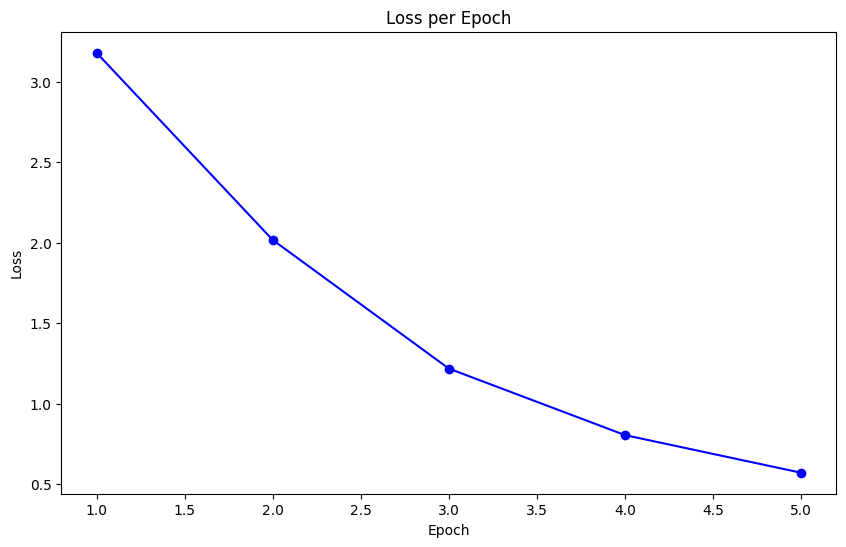

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), losses_SGD, marker='o', linestyle='-', color='blue')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

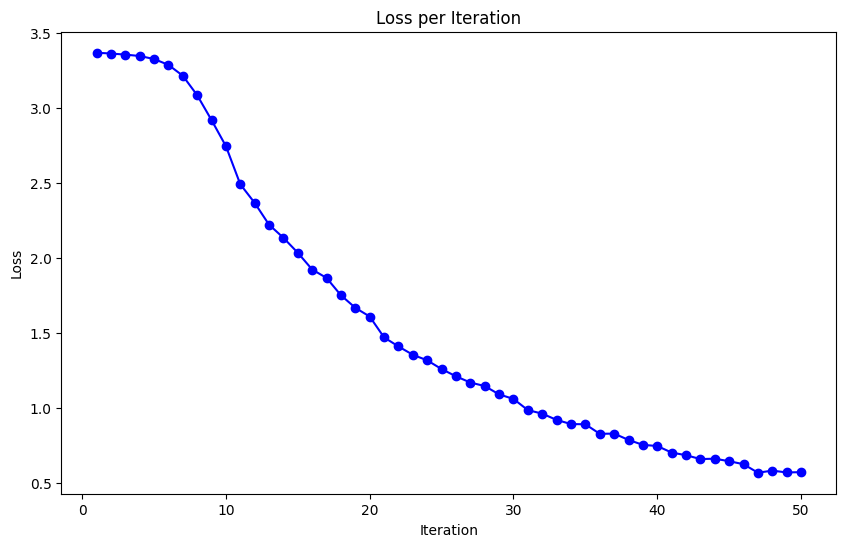

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), average_loss_SGD, marker='o', linestyle='-', color='blue')
plt.title('Loss per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

This plot shows what happens to loss every 1000 iterations

In [ ]:
# Calculate accuracy with the general function
acc = model_accuracy(asl_net_SGD)

Test Accuracy: 89.66%


In [ ]:
accdf=pd.DataFrame.from_dict({'SGD':[acc],'Adam':[accuracy]}).T.reset_index()
accdf.rename(columns={0:'score'}, inplace=True)
accdf

,index,score
0,SGD,89.655172
1,Adam,100.000000


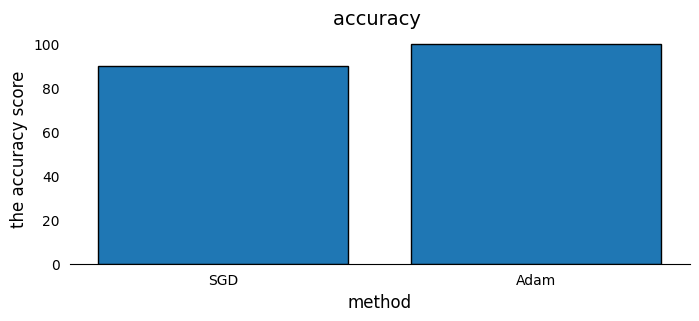

In [ ]:
plt.figure(figsize=(8, 3))
plt.bar(accdf['index'],accdf['score'], edgecolor='black')
plt.title('accuracy ', fontsize=14)
plt.xlabel('method', fontsize=12)
plt.ylabel('the accuracy score', fontsize=12)
sns.despine(top=True, right=True, bottom=False, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.show()

**SGD vs. Adam**


*   Run time - SDG ran on GPU with 4 min per epoch, and Adam on GPU with 5.5 minutes - it's clear that SGD is faster, mainly since it calculates the gradient based on one sample rather than the entire dataset
*   Loss - With SGD the average loss presented above shows that it always corrects. This aligns with the above statement on the way gradient is calculated. Adam reached better results after just two epochs so it's a decision on run time vs. accuracy
*   Accuracy - SGD fell a bit short, but additional epochs would probably help, and another option is to add momentum to SGD as a hyper parameter to be tested. Momentum will help to converge faster by giving the gradient a kick in the right direction, but too much momemntum might miss the optimal point



1.   *What is Cross Entropy? Explain.*

The data was collected the site https://www.v7labs.com/blog/cross-entropy-loss-guide#h1 and from the lecture

Cross entropy calculates the probability to be classified for each class, either binary or multi-class. In the ideal state the probability for one class would be 1 and the rest 0, however in deep learning the probability will vary and the cross entropy will penalize logarithmically for a higher predicted probability of the wrong class. In other words, we want to predict the correct label as close to 1, and other false classes as close to 0, when this is not the case we will be penalized. All penalties are summed and divided by the number of samples (with a negative sign). There are two functions, one for binary and one for multi class

Binary Cross Entropy

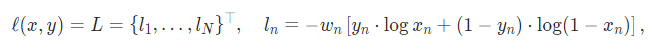

Multi Class Cross Entropy

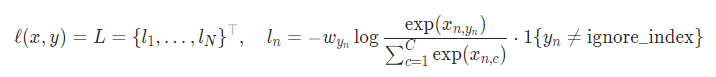

2.   *Which other loss function/s are suitable for the problem solved by the ASLNet?*

  We've reviewed the possible loss functions in pytorch (https://pytorch.org/docs/stable/nn.html#loss-functions). The search was for loss fuctions that could work with multi class classification problems rather then regression or binary. A few options we've found were (we chose two but there are more):

*   The negative log likelihood loss - it has a log-probabilities of each class, similar to cross entropy. Could handle multi dimentions which is needed for image classification and convolution. There is an option to pass a weights 1D array to account different penelties for each class.




  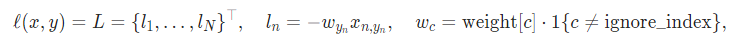

  *   Multi Margin Loss - Sums the margin between the predicted and ground truth. Could also pass a weighted array for all classes, similar to what was explained earier. It could handle multi class

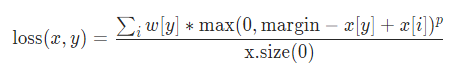

3.   *The current implemented batch size is 8. Which other batch size could we work with? Present at least one option with an explanation as to why it works.*

  Any batch size that the trainning data could be divided by it can work, so if 8 works then 4 would work as well. 4 will result in less runtime per batch (because it smaller), but more batchs to run.



**Conclusions**

In summation, for this specific task, ASL net with reLU activation and Adam optimizer were the best choices when combining both speed and accuracy.

Regarding challenges we encountered, the main problem was running all the code because even with the GPU the code (including all the training) took a long time to run, also we encountered the problem of overfitting the test sometimes, and therefore we had to understand what causes this (the test set is too small).

Throughout this process we've metioned a few drawbacks and future actions to improve the model:


1.   Validation and test data - must be added
2.   Variations in training data - need to add more angles and backgrounds. Different hand sizes and colors
3. Vanishing gradients and overfitting - both reLU and tanh which are the most suitible had experienced both features, tanh much faster in terms of vanishing gradients. The above first two points should fix this
4. To save run time we could consider wither reducing the number of epochs to two as the loss per epoch and per 1000 iterations shown that most of the learning was until two epochs. Or if we'll have more data, we could try different hyper parameters for momentum in SGD. Another option if data would remain the same is to reduce image size even more, we are already at 100% so maybe reducing the image further won't harm the results and will save computation and memory

